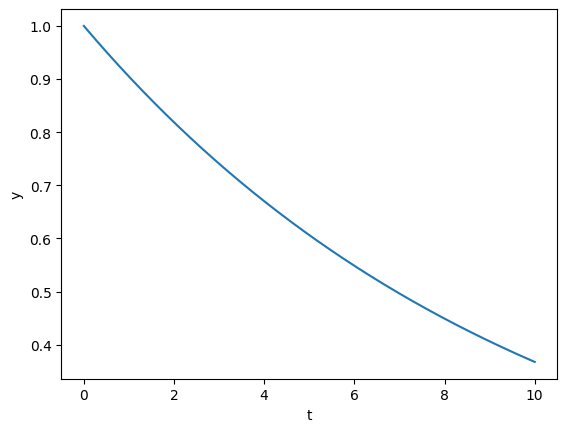

In [28]:

import numpy as np
import matplotlib.pyplot as plt

# 定义常数
k = 0.1
dt = 0.01
T = 10

# 初始化
t = np.arange(0, T+dt, dt)
y = np.zeros(len(t))
y[0] = 1

# 迭代求解
for i in range(len(t)-1):
    y[i+1] = y[i] - k * y[i] * dt

# 绘图
plt.plot(t, y)
plt.xlabel('t')
plt.ylabel('y')
plt.show()


对于


$y'=y-\frac{2x}{y}, x\in (0,1),\\ y(0)=1$ 

In [29]:
#用改进欧拉法解上面的方程
import pandas as pd

In [39]:
def f(x,y):
    '''定义微分方程'''
    return y - 2*x / y 
def g(x):
    '''微分方程的解'''
    return np.sqrt(1 + 2 * x )
h = 0.1 
x = np.arange(0,1+h,h)
y = np.zeros_like(x)
y_exact = np.zeros_like(x)
y[0] = 1
for i in range(len(x)-1):
    y_1 = y[i] + h * (y[i] - 2 * x[i]/y[i])
    y_2 = y[i] + h * (y_1 - 2 * x[i+1]/y_1)
    y[i+1] = (1/2) * (y_1 + y_2)
    y_exact[i] = g(x[i])
y_exact[-1] = g(x[-1])
result = np.column_stack((x, y, y_exact))# 将数组中相对应的元素展示出来
result




array([[0.        , 1.        , 1.        ],
       [0.1       , 1.09590909, 1.09544512],
       [0.2       , 1.18409657, 1.18321596],
       [0.3       , 1.26620136, 1.26491106],
       [0.4       , 1.34336015, 1.34164079],
       [0.5       , 1.41640193, 1.41421356],
       [0.6       , 1.4859556 , 1.4832397 ],
       [0.7       , 1.55251409, 1.54919334],
       [0.8       , 1.61647478, 1.61245155],
       [0.9       , 1.67816636, 1.67332005],
       [1.        , 1.7378674 , 1.73205081]])

-------
np.arange   and  np.linspace 

In [36]:
x = np.linspace(0,1,10)
y=np.array([])
for i in range(10):
    y = np.append(y,2*x[i])
print(y)

[0.         0.22222222 0.44444444 0.66666667 0.88888889 1.11111111
 1.33333333 1.55555556 1.77777778 2.        ]


In [37]:
x = np.arange(0,1,0.1)
x[1]

0.1

In [33]:
y = np.zeros_like(x)
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

---------

In [40]:
#四阶 Runge-kutta 方法
for i in range(len(x) -1 ):
    k1 = y[i] - 2 * x[i]/y[i]
    k2 = y[i] + (h/2) * k1 - (2*x[i] + h) / (y[i] + h/2 * k1)
    k3 = y[i] + h/2 * k2 - (2*x[i] + h) / (y[i] + h/2 * k2)
    k4 = y[i] + h * k3 - (2 * (x[i] + h)) / (y[i] + h * k3)
    y[i+1] = y[i] + h/6 * (k1 + 2*k2 + 2*k3 + k4)

result_1 = np.column_stack((x, y, y_exact))
result_1

array([[0.        , 1.        , 1.        ],
       [0.1       , 1.09544553, 1.09544512],
       [0.2       , 1.18321675, 1.18321596],
       [0.3       , 1.26491223, 1.26491106],
       [0.4       , 1.34164235, 1.34164079],
       [0.5       , 1.41421558, 1.41421356],
       [0.6       , 1.48324222, 1.4832397 ],
       [0.7       , 1.54919645, 1.54919334],
       [0.8       , 1.61245535, 1.61245155],
       [0.9       , 1.67332466, 1.67332005],
       [1.        , 1.73205637, 1.73205081]])

In [ ]:
2/3 * 3/2 


1.0

## 对于双曲方程
$ u_t + u_x = 0$

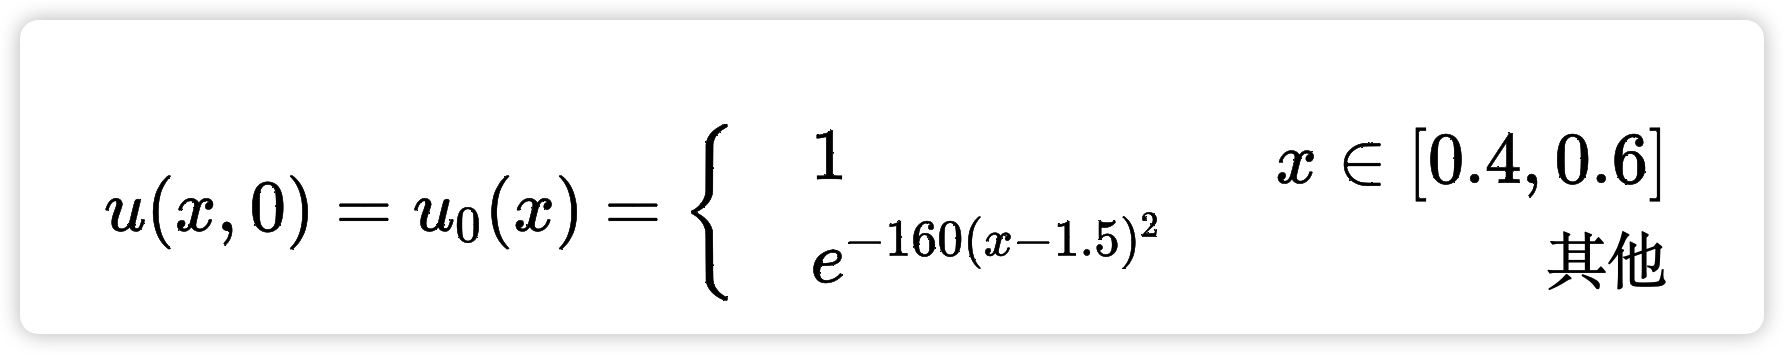

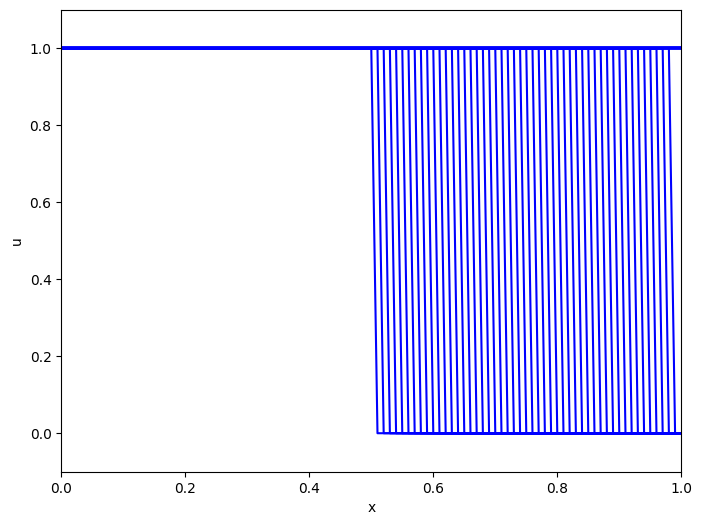

In [48]:
# 例子
import numpy as np
import matplotlib.pyplot as plt

# 迎风格式函数
def upwind_scheme(u, c, dx, dt):
    # 创建一个空数组来存储新解
    u_new = np.zeros_like(u)
    # 计算Courant数
    courant = c * dt / dx
    # 进行迭代计算
    for i in range(1, len(u)):
        if c >= 0:
            u_new[i] = u[i] - courant * (u[i] - u[i-1])
        else:
            u_new[i] = u[i] - courant * (u[i+1] - u[i])
    # 设置边界条件
    u_new[0] = u_new[1]
    u_new[-1] = u_new[-2]
    return u_new

# 设置初始条件
x = np.linspace(0, 1, 101)
u = np.zeros_like(x)
u[x < 0.5] = 1

# 设置模拟参数
c = 1.0
dx = x[1] - x[0]
dt = 1 * dx / c
t_max = 1.0

# 创建一个图形窗口
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_xlim((0, 1))
ax.set_ylim((-0.1, 1.1))

# 进行时间步进计算
t = 0
while t < t_max:
    u = upwind_scheme(u, c, dx, dt)
    t += dt
    ax.plot(x, u, 'b-')

# 显示图形
plt.show()


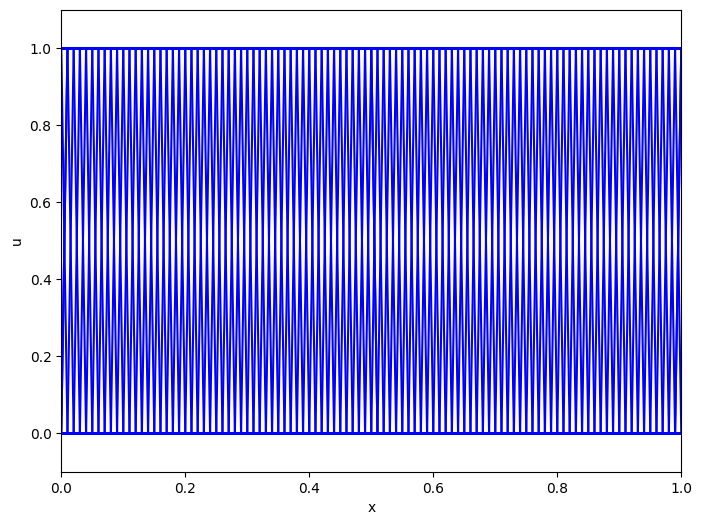

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Lax-Friedrichs格式函数
def lax_friedrichs_scheme(u, c, dx, dt):
    # 创建一个空数组来存储新解
    u_new = np.zeros_like(u)
    # 计算Courant数
    courant = c * dt / dx
    # 进行迭代计算
    for i in range(1, len(u)-1):
        u_new[i] = 0.5 * (u[i+1] + u[i-1]) - 0.5 * courant * (u[i+1] - u[i-1])
    # 设置边界条件
    u_new[0] = u_new[-2]
    u_new[-1] = u_new[1]
    return u_new

# 设置初始条件
x = np.linspace(0, 1, 101)
u = np.zeros_like(x)
u[x < 0.5] = 1

# 设置模拟参数
c = 1.0
dx = x[1] - x[0]
dt = 0.01
t_max = 1.0

# 创建一个图形窗口
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('x')
ax.set_ylabel('u')
ax.set_xlim((0, 1))
ax.set_ylim((-0.1, 1.1))

# 进行时间步进计算
t = 0
while t < t_max:
    u = lax_friedrichs_scheme(u, c, dx, dt)
    t += dt
    ax.plot(x, u, 'b-')

# 显示图形
plt.show()


----------

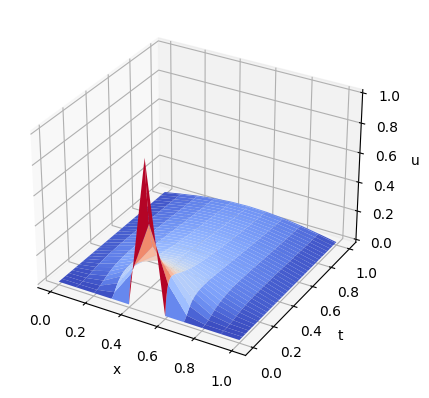

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# 设置空间和时间的步长
dx = 0.1
dt = 0.01

# 设置空间区间和时间区间
L = 1
T = 1

# 计算空间和时间节点数
nx = int(L/dx) + 1
nt = int(T/dt) + 1

# 设置物理参数
alpha = 0.1

# 设置初始条件和边界条件
u0 = np.zeros(nx)
u0[int(0.5/dx)] = 1  # 初始温度在区间的中间位置
u0[0] = u0[-1] = 0   # 边界条件

# 初始化解向量
u = np.zeros((nt, nx))
u[0, :] = u0

# 进行数值求解
for n in range(1, nt):
    for i in range(1, nx-1):
        u[n, i] = u[n-1, i] + alpha*dt/dx**2 * (u[n-1, i-1] - 2*u[n-1, i] + u[n-1, i+1])
    u[n, 0] = 0
    u[n, -1] = 0

# 绘制结果
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)
X, T = np.meshgrid(x, t)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, T, u, cmap='coolwarm')
ax.set_xlabel('x')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.show()


------

In [58]:
aa = np.array([[1,2,3],[4,5,6]])
aa[:,0]=[8,9] # 这个也是可以的，不用np.array([8,9])
aa

array([[8, 2, 3],
       [9, 5, 6]])

In [59]:
aa[0,:]=0
aa

array([[0, 0, 0],
       [9, 5, 6]])

In [61]:
def f(x):
    return (4 * x *(3 - x))
print(f(aa[1,:]))

[-216  -40  -72]


In [68]:
for i in range(1,9,2):
    print(i)

1
3
5
7


-------
其他人的参考，其实可以改进，少用for

In [70]:
import numpy as np
import matplotlib.pyplot as plt

h = 0.1#空间步长
N =30#空间步数
dt = 0.0001#时间步长
M = 10000#时间的步数
A = dt/(h**2) #lambda*tau/h^2
U = np.zeros([N+1,M+1])#建立二维空数组
Space = np.arange(0,(N+1)*h,h)#建立空间等差数列，从0到3，公差是h

#边界条件
for k in range(0,M+1):
    U[0,k] = 0.0
    U[N,k] = 0.0

#初始条件
for i in range(0,N):
    U[i,0]=4*i*h*(3-i*h)

#递推关系
for k in range(0,M):
    for i in range(1,N):
        U[i,k+1]=A*U[i+1,k]+(1-2*A)*U[i,k]+A*U[i-1,k]

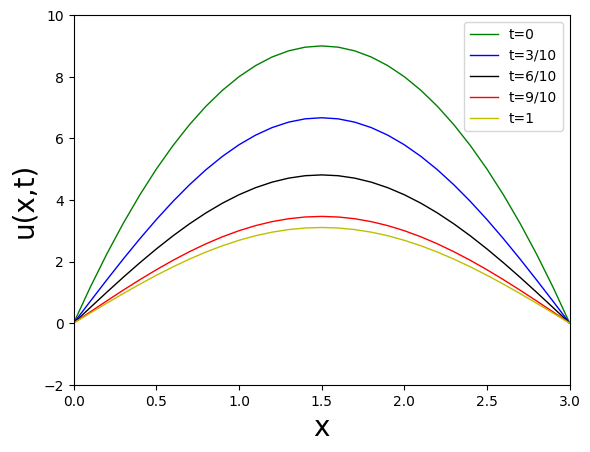

In [71]:
#不同时刻的温度随空间坐标的变化
plt.plot(Space,U[:,0], 'g-', label='t=0',linewidth=1.0)
plt.plot(Space,U[:,3000], 'b-', label='t=3/10',linewidth=1.0)
plt.plot(Space,U[:,6000], 'k-', label='t=6/10',linewidth=1.0)
plt.plot(Space,U[:,9000], 'r-', label='t=9/10',linewidth=1.0)
plt.plot(Space,U[:,10000], 'y-', label='t=1',linewidth=1.0)
plt.ylabel('u(x,t)', fontsize=20)
plt.xlabel('x', fontsize=20)
plt.xlim(0,3)
plt.ylim(-2,10)
plt.legend(loc='upper right')
plt.show()

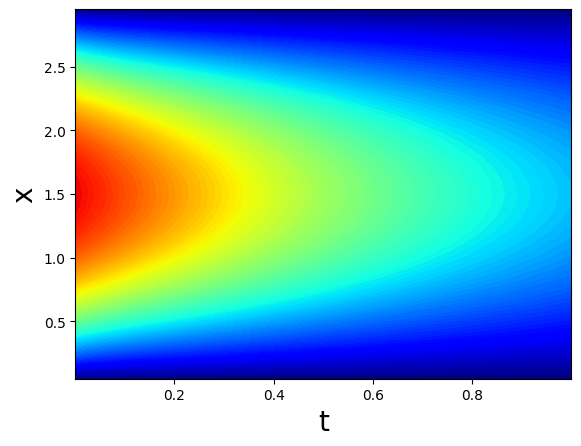

In [74]:
#温度等高线随时空坐标的变化，温度越高，颜色越偏红
extent = [0,1,0,3]#时间和空间的取值范围
levels = np.arange(0,10,0.1)#温度等高线的变化范围0-10，变化间隔为0.1
plt.contourf(U,levels,origin='lower',extent=extent,cmap=plt.cm.jet)
plt.ylabel('x', fontsize=20)
plt.xlabel('t', fontsize=20)
plt.show()

---------